In [1]:
from Tools import *
from photoObject import *
import emcee
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import xmatch
from Tools import *

# Here I get the fesc for galaxies that have both Lya and Ha

In [2]:
def angstromTokms(centralA,As):
    c=299792
    v=c*(As-centralA)/centralA
    return v

def SpecialkmsToangstrom(v,centralA):
    c=300000
    As = centralA*(v+c)/c
    return As

def LineToRedshift(Obs,Rest):
    return (Obs/Rest)-1

def RedshiftToLine(Obs,z):
    return (Obs/(1+z))

In [3]:
CatBino=ReadCatalogs("../A-Catalogs/Binospec-Candels.cat")
CatBino=CatBino[CatBino["Type"]=="LAE"]
Fresco=ReadCatalogs("../A-Catalogs/Fresco_latest.cat")

idx,d2d=xmatch.xmatch(CatBino["ra_candels"],CatBino["dec_candels"],Fresco["ra"],Fresco["dec"])
mask=[]
for i,d in zip(idx,d2d):
    print(i,d)
    if d.value<(0.5/3600.):
        mask.append(True)
    else:
        mask.append(False)


CatBino=CatBino[mask]
idx=idx[mask]
d2d=d2d[mask]
Fresco=[Fresco[i] for i in idx]


ids=[]
Fresco2,Bino2 = [],[]

# iterate through each element in the original array
for i,element in enumerate(Fresco):
    # add the element to the new list if it is not already there
    if element["id"] not in ids:
        Fresco2.append(element)
        Bino2.append(CatBino[i])
    else:
        print(CatBino[i]["id_charlotte"])
    ids.append(element["id"])

Fresco=Fresco2
CatBino=Bino2




9765 0d00m23.41174514s
3352 0d03m55.00773802s
8714 0d02m16.50717627s
7800 0d00m00.40147666s
2585 0d00m00.09455596s
2789 0d02m53.23715383s
10479 0d01m50.72793459s
7900 0d00m54.2226779s
2364 0d00m00.10954985s
7407 0d00m00.10085638s
3219 0d00m00.07149453s
2247 0d00m00.01642394s
2969 0d00m00.10270614s
849 0d00m00.11388678s
3208 0d01m26.02532357s
1269 0d00m00.08469526s
2756 0d00m00.05184561s
3858 0d00m00.04288048s
3008 0d01m50.65945335s
9338 0d01m50.42778597s
9765 0d03m50.69427157s
9765 0d02m31.27085234s
9765 0d03m00.0299057s
3352 0d03m55.7169559s
1045 0d01m33.14955941s
7888 0d01m25.81708182s
8714 0d02m52.82130127s
8714 0d02m47.27850853s
8717 0d02m43.10520718s
7834 0d01m08.53831638s
7834 0d01m19.73963997s
7834 0d00m35.45576213s
2789 0d03m20.15185597s
10479 0d02m47.12591666s
7802 0d01m12.031955s
6744 0d00m58.66632277s
7879 0d01m28.41692669s
1563 0d00m00.15622892s
7079 0d00m00.01940718s
4002 0d00m00.0150316s
3352 0d01m51.59319431s
1016 0d00m00.10032998s
6744 0d01m50.82026676s
8000 0d02m29.882

In [4]:
LyaFlux=[gal["LyaFlux"] for gal in CatBino]
ids=[gal["id_charlotte"] for gal in CatBino]
ra=[gal["ra_candels"] for gal in CatBino]
dec=[gal["dec_candels"] for gal in CatBino]

LyaFlux=10**np.array(LyaFlux)
lines=ascii.read("../A-Catalogs/HaLines.cat")
DetectionLimit=2e-18
HaFlux=[]

for f in LyaFlux:
    HaFlux.append(f/0.4/8.7)



In [5]:
fesc=[]
count=0
noLyaID=[]
id=[]
fescLAELim=[]
zs={"Ha":[],"NoHa":[]}
for i,f,r,d in zip(ids,LyaFlux,ra,dec):
    if lines[count]["Ha"]=="X" and lines[count]["Oiii"]=="X":
        noLyaID.append(i)
        zs["NoHa"].append(CatBino[count]["z"])
        print(i,CatBino[count]["id_charlotte"],f/2e-18/8.7,"  lya esc")
        fesc.append(f/2e-18/8.7)
        id.append(CatBino[count]["id_charlotte"])
    else:
        zs["Ha"].append(CatBino[count]["z"])
    count=count+1

fescLAELim.append([id,fesc])
np.save("../A-Catalogs/LAEfescLim.npy",fescLAELim)

z5_GNW_12024 z5_GNW_12024 0.4116007832623668   lya esc
z6_GND_19165 z6_GND_19165 0.41285504238716136   lya esc
z6_GND_14309 z6_GND_14309 1.1115803216538125   lya esc
z6_GND_44831 z6_GND_44831 1.1319805825665512   lya esc
z7_GND_43678 z7_GND_43678 0.8872311911027198   lya esc
z8_GND_35384 z8_GND_35384 1.4681988466165294   lya esc
Stark11_42_13066 Stark11_42_13066 0.29962048605881864   lya esc
Stark11_32_16773 Stark11_32_16773 0.2823860930449552   lya esc


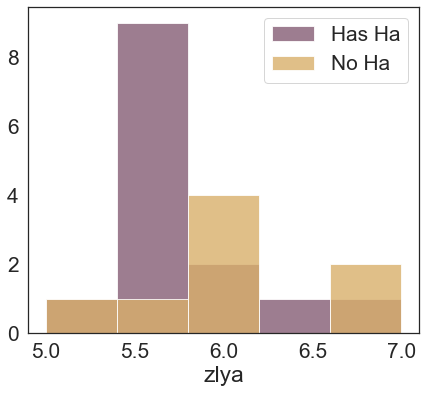

In [6]:
sns.set_theme(style="white",font_scale = 1.9)
plt.rcParams["figure.figsize"] = (7,6)
from palettable.cartocolors.qualitative import Antique_2
from matplotlib.colors import ListedColormap

cmap = ListedColormap(Antique_2.mpl_colors)

  #plt.plot(JWSTkms,JWSTFlux,drawstyle="steps",color=cmap(0.3),lw=3)
  #  plt.plot(Musekms,MuseFlux,drawstyle="steps",lw=3,color=cmap(0.8))

plt.hist(zs["Ha"],range=[5,7],bins=5,color=cmap(0.3),alpha=0.8, label="Has Ha")
plt.hist(zs["NoHa"],range=[5,7],bins=5,color=cmap(0.8),alpha=0.8,label= "No Ha")
plt.xlabel("zlya")
plt.legend()
plt.show()

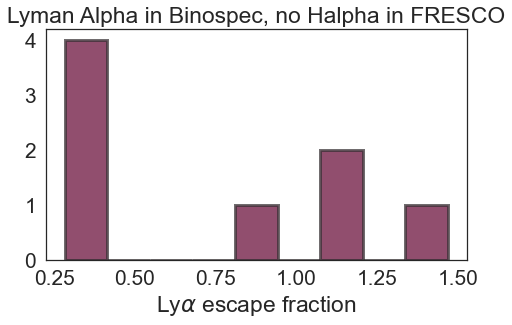

In [7]:
sns.set_theme(style="white",font_scale = 1.9)
plt.rcParams["figure.figsize"] = (7,5)

kws = dict(linewidth = 3,edgecolor="#342E31",color='#630330',alpha=0.7,bins=9)
plt.hist(fesc,**kws)
plt.xlabel(r"Ly$\alpha$ escape fraction")
plt.title("Lyman Alpha in Binospec, no Halpha in FRESCO")
plt.tight_layout()
plt.show()


In [8]:
import os
FrescMeta={}
inFresco=[]
for i in range(0,len(CatBino)):
    print(i,Fresco[i]["id"],CatBino[i]["id_charlotte"],CatBino[i]['z'],6564.614*(1+CatBino[i]['z']),Fresco[i]["ra"],CatBino[i]["ra_candels"],CatBino[i]['HaFWHM'])
    inFresco.append(CatBino[i]["id_charlotte"])
    #if len(str(Fresco[i]["id"]))==5:
    #    FrescMeta[str(CatBino[i]["id_charlotte"])]=[str(Fresco[i]["id"]),CatBino[i]['z']]
    #    os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_'+str(Fresco[i]["id"])+'.1D.fits')
    #    os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_'+str(Fresco[i]["id"])+'.stack.fits')
    #if len(str(Fresco[i]["id"]))==4:
    #    FrescMeta[str(CatBino[i]["id_charlotte"])]=["0"+str(Fresco[i]["id"]),CatBino[i]['z']]
    #    os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_0'+str(Fresco[i]["id"])+'.1D.fits')
    #    os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_0'+str(Fresco[i]["id"])+'.stack.fits')
    #if len(str(Fresco[i]["id"]))==3:
    #    FrescMeta[str(CatBino[i]["id_charlotte"])]=["00"+str(Fresco[i]["id"]),CatBino[i]['z']]
    #    os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_00'+str(Fresco[i]["id"])+'.1D.fits')
    #    os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_00'+str(Fresco[i]["id"])+'.stack.fits')


np.save("../A-Catalogs/LAEinFresco.npy",np.array(inFresco))

0 32485 z5_GNW_12024 5.1661424709150126 40478.34519056328 189.14299179 189.14296 nan
1 30244 z6_GNW_14511 5.6155224679571525 43428.35141046607 189.10054126 189.1005376 313.21338466438465
2 15339 z6_GND_19165 6.047127492464126 46261.671796814895 189.34779338 189.34773322 nan
3 10859 z6_GND_14309 5.967628327784391 45739.79046737 189.33410319 189.33404671 nan
4 29525 z6_GND_36100 5.602855555666433 43345.19802070564 189.19125113 189.19127434 491.06679741782136
5 2432 z6_GND_43125 5.658455285989933 43710.18878878352 189.18912876 189.18913737 351.2182161740493
6 29820 z6_GND_36553 5.610946246224566 43398.310281213235 189.15632716 189.156387 nan
7 3869 z5_GND_7766 5.5912848204122305 43269.24061006561 189.14004222 189.139984 nan
8 6181 z6_GND_44831 6.736454278667005 50786.83606809732 189.17510657 189.17513458 nan
9 3100 z7_GND_43678 6.121224733026063 46748.091579569154 189.23518927 189.23520109999998 nan
10 4650 z7_GND_8358 6.81350987154856 51292.676291905875 189.15530022 189.15531040000002 na

In [9]:
ids=[]
for i,j in zip(Fresco,CatBino):
    if len(str(i["id"])) == 3:
        num = "00" + str(i["id"])
    elif len(str(i["id"])) == 4:
        num = "0" + str(i["id"])
    else:
        num=str(i["id"])
    ids.append(num)

29525
5.602855555666433
5.602855555666433
38208.584494237555 50802.54773372237
$\frac{S}{N}$ :  -2.362040981980016


<ipython-input-10-31bfeda9c764>:26: RuntimeWarning: invalid value encountered in true_divide
  ax1.plot(oriWave,f[1].data["line"]/f[1].data["flat"],lw=1,color="#702963",ls="--",alpha=0.8,zorder=0)
<ipython-input-10-31bfeda9c764>:27: RuntimeWarning: invalid value encountered in true_divide
  ax1.plot(oriWave,f[1].data["flux"]/f[1].data["flat"],lw=2,color="#702963",alpha=0.6,zorder=100)
<ipython-input-10-31bfeda9c764>:29: RuntimeWarning: invalid value encountered in true_divide
  ax1.fill_between(oriWave,-f[1].data["err"]/f[1].data["flat"],f[1].data["err"]/f[1].data["flat"],color='#702963',alpha=0.2,zorder=-10)
<ipython-input-10-31bfeda9c764>:39: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(Wave,f[1].data["flux"]/f[1].data["flat"]," ")
<ipython-input-10-31bfeda9c764>:58: RuntimeWarning: invalid value encountered in true_divide
  datos=(f[1].data["flux"]/f[1].data["flat"])[mask]
<ipython-input-10-31bfeda9c764>:81: RuntimeWarning: invalid value encountered in true_di

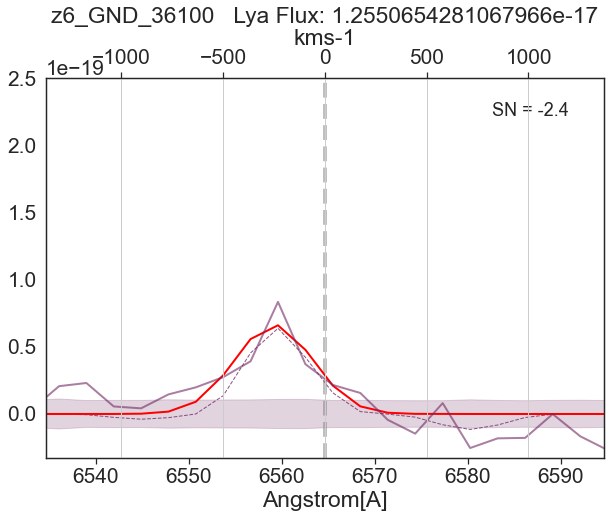

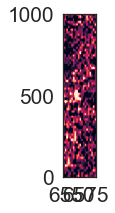

In [10]:
from scipy import interpolate
import ipympl
%load_ext autoreload
%autoreload 
%matplotlib inline

i=4+3
i=i-3
print(ids[i])
f=fits.open("../A-Catalogs/data/large_files/Fresco/fresco-only-n-v2_"+ids[i]+".1D.fits")
f2D=fits.open("../A-Catalogs/data/large_files/Fresco/2D/fresco-only-n-v2_"+ids[i]+".stack.fits")
sns.set_theme(style="white",font_scale = 1.9)
plt.rcParams["figure.figsize"] = (10,7)
fig, ax1 = plt.subplots()
print(CatBino[i]['z'])
Ha=6564.614#*(1+CatBino[i]['z'])
print(CatBino[i]['z'])
Oiii=5008#*(1+CatBino[i]['z'])

print(min(f[1].data["wave"]),max(f[1].data["wave"]))
Wave=angstromTokms(Ha,f[1].data["wave"]/(1+CatBino[i]['z']))
oriWave=f[1].data["wave"]/(1+CatBino[i]['z'])


#ax1.axhline(y=0,color="#702963",alpha=0.6)
ax1.plot(oriWave,f[1].data["line"]/f[1].data["flat"],lw=1,color="#702963",ls="--",alpha=0.8,zorder=0)
ax1.plot(oriWave,f[1].data["flux"]/f[1].data["flat"],lw=2,color="#702963",alpha=0.6,zorder=100)

ax1.fill_between(oriWave,-f[1].data["err"]/f[1].data["flat"],f[1].data["err"]/f[1].data["flat"],color='#702963',alpha=0.2,zorder=-10)


ax1.set_xlabel("Angstrom[A]")
ax1.tick_params('y')


# Create the second x-axis
ax2 = ax1.twiny()

ax2.plot(Wave,f[1].data["flux"]/f[1].data["flat"]," ")
ax2.tick_params('y', colors='r')
ax2.set_xlabel("kms-1")


ax1.axvline(x=Ha,ls="--",color="grey",label="Expected Ha",alpha=0.5,lw=4,zorder=0)
ax1.axvline(x=Oiii,ls="--",color="green",label="Expected oiii",alpha=0.5,lw=4,zorder=0)

interp = interpolate.interp1d(oriWave, Wave)

Ha=Ha

Limit=True
if Limit==True:
    x_min = Ha-30#min(oriWave)
    x_max = Ha+30#max(oriWave)
    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(interp(x_min), interp(x_max))
    mask=(np.array(oriWave)>x_min) & (np.array(oriWave)<x_max)
    datos=(f[1].data["flux"]/f[1].data["flat"])[mask]
    ax1.set_ylim(np.min(datos)*1.3, np.max(datos)*3)



if Limit==False:
    x_min = min(oriWave)
    x_max = max(oriWave)
    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(interp(x_min), interp(x_max))
    sig=np.nanstd(f[1].data["flux"]/f[1].data["flat"])
    ax1.set_ylim(-2*sig, 4*sig)

plt.title(str(CatBino[i]['id_charlotte'])+"   Lya Flux: "+str(LyaFlux[i]))

test_fwhm=True
if test_fwhm==True:
    move=70
    pos=Ha-move
    fwhm=kmsToangstrom(200,pos)
    mask=(np.array(oriWave)>pos-fwhm/2) & (np.array(oriWave)<pos+fwhm/2)
    ax1.axvline(x=pos-fwhm/2,ls="--",color="gray")
    ax1.axvline(x=pos+fwhm/2,ls="--",color="gray")
    Signal=(np.sum((f[1].data["flux"]/f[1].data["flat"])[mask]))
    Noise=np.sqrt(np.sum(((f[1].data["err"]/f[1].data["flat"])[mask])**2))
    SN=Signal/Noise
    ax1.text(0.8,0.9,s=r"SN = "+str(np.round(SN,1)),transform=ax1.transAxes,fontsize=18)
    print(r"$\frac{S}{N}$ : ", SN)


def Gausiana(x,Amp,Mean,FWHM,C):
    fw_param=FWHM/(2*np.sqrt(2*np.log(2)))
    return (Amp/(fw_param*np.sqrt(2*np.pi))) * np.exp( -0.5 * (x-Mean)**2 / fw_param**2)  + C    



plt.grid()

fwhm=4.3*2.3

ax1.plot(oriWave,Gausiana(oriWave,0.07e-17,Ha-5.5,fwhm,0),color="red",lw=2)
plt.show()
# S/N



plt.rcParams["figure.figsize"] = (10,3)
fig, ax1 = plt.subplots()
ax1.imshow(f2D[1].data,extent=[min(oriWave),max(oriWave),0,1000],aspect=0.3,vmin=-0.003,vmax=0.01)
ax1.set_xlim(x_min, x_max)




plt.show()

# Do ones with Lya and HA

In [11]:
def skewed_gaussian_simple(x,mu,sigma,g,C) :
    """Gaussian"""
    return np.exp( -0.5 * (x-mu)**2 / sigma**2)* (1+scispe.erf( g*(x-mu)/(sigma*np.sqrt(2)))) + C

def SkewedPeak(loc,fwhm,shape):
    peaks=[]
    for i in range(0,len(loc)):
        try:
            x=np.arange(loc[i]-500,loc[i]+500,0.01)
            d=shape[i]/(np.sqrt(1+shape[i]**2))
            sigma=(fwhm[i]/(2*np.sqrt(2*np.log(2)))/np.sqrt((1-(2*d**2/np.pi))))
            #print(sigma)
            
            gausiana=skewed_gaussian_simple(x,loc[i],sigma,shape[i],0.)
            id_peak=np.where(gausiana == max(gausiana))
            peaks.append(x[id_peak][0])
            #print(x[id_peak][0])
        except:
            peaks.append(np.nan)
    return np.array(peaks)

def redshift(Lambda):
    z=(Lambda/1215.3357)-1
    return z



In [12]:
%load_ext autoreload
%autoreload
from photoObject import *
PObj=[]
HaCat=ascii.read("../A-Catalogs/HaLines.cat")
All_Dist=np.load("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/B-CalibrationCode/Prob_Dist26Feb24.npy",allow_pickle=True)
for i in range(0,len(HaCat)):
    if (HaCat[i]["Oiii"]!="X" or HaCat[i]["Ha"]!="X") and HaCat[i]["Flag"]<=3:
        #zspec=(np.float(HaCat[i]["Ha"])/6562.8)-1      
        print(CatBino[i]["id_charlotte"],HaCat[i]["ID"],Fresco[i]["id"])
        Other=[Fresco[i]["id"],CatBino[i]["z"],CatBino[i]["ra_candels"],CatBino[i]["dec_candels"]]
        for g in All_Dist:
            if g[2]["ID"]==CatBino[i]["id_charlotte"]:
                l=g[0]["loc"]
                f=g[0]["fwhm"]
                g=g[0]["g"]
                idx = np.random.choice(np.arange(len(l)), 500, replace=False)
                l=l[idx]
                f=f[idx]
                g=g[idx] 
                zlya=redshift(SkewedPeak(l,f,g))
        PObj.append(PhotoObject(HaCat[i],Other,zlya))


 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
z6_GNW_14511 z6_GNW_14511 30244
z6_GND_36100 z6_GND_36100 29525
z6_GND_43125 z6_GND_43125 2432
z6_GND_36553 z6_GND_36553 29820
z5_GND_7766 z5_GND_7766 3869
z7_GND_8358 z7_GND_8358 4650
z5_GND_39445 z5_GND_39445 31564
z5_GND_27819 z5_GND_27819 23493
z5_GND_21153 z5_GND_21153 17353
z5_GND_17752 z5_GND_17752 13902
Stark11_43_3982 Stark11_43_3982 16141
Stark11_33_17705 Stark11_33_17705 21531
Stark11_34_24923 Stark11_34_24923 4427
Jung18_z6_GND_28438 Jung18_z6_GND_28438 24032


In [13]:
def Gausiana(x,Amp,Mean,FWHM,C):
    fw_param=FWHM/(2*np.sqrt(2*np.log(2)))
    return (Amp/(fw_param*np.sqrt(2*np.pi))) * np.exp( -0.5 * (x-Mean)**2 / fw_param**2)  + C    

In [14]:
def FitGaussian(wave,Flux,FluxErr,lineWave,ShowPlots=True):
    inValues=[0,lineWave,20,0]
    labels = ["Amp","Mean", "FWHM","C"]
 
    stp=1500
    discard=1000
    walknum=50
    sampler,logprob=MCMC.runMCMC([wave,Flux,FluxErr],inValues,lineWave,steps=stp,nwalkers=walknum)
    if ShowPlots==True:
        MCMC.plotChain(sampler,labels)
        MCMC.plotCorner(sampler,labels,discard=discard)
        MCMC.plotModels(sampler,wave,Flux,FluxErr,discard=discard)

    pairs,ampVals,meanVals,stdVals,cVals=MCMC.returnParameters(sampler,discard=discard)


    return ampVals,meanVals,stdVals,cVals,pairs#betaVals[1],MuvVals[1],[betaErr,MuvErr],[Flux,FluxErr],pairs


In [15]:
def SNR(wave,flux,err,zsys,fwhm_kms,line):
    L={"Ha":6564.614,"Oiii":5008.239}
    LineWave=L[line]*(1+zsys)
    FWHM=Tools.kmsToangstrom(fwhm_kms,LineWave)
    mask=(wave>LineWave-FWHM/2) & (wave<LineWave+FWHM/2)
    flux=flux[mask]
    err=err[mask]
    
    Signal=np.sum(flux)
    Noise=np.sqrt(np.sum(err**2))
    SNR=Signal/Noise


    return SNR

def retrievePairSTD(wave,pairs):
    gs=[]
    for i,s in enumerate(pairs):
        if i%50==0:
            gs.append(Gausiana(wave,*s)-s[3])
    FitAreaSTD=[]
    for point in np.transpose(gs):
        FitAreaSTD.append(np.std(point))
    FitAreaSTD=np.array(FitAreaSTD)
    return FitAreaSTD

def fix_XTicks(ticks,typeOfData):
    if typeOfData=='wave':
        for t in ticks[:-1]:
            if np.abs(ticks[-1]-t)<3:
                ticks=ticks[ticks!=t]
        
        newt=[]
        for t in ticks:
            if t%5==0:
                newt.append(int(t))
            else:
                newt.append(np.round(t,2))

        print(newt)
        return newt

    if typeOfData=='kms':
        for t in ticks[:-1]:
            if np.abs(ticks[-1]-t)<1:
                ticks=ticks[ticks!=t]
        return ticks

def fix_XticksVelocities(cLambda,typeOfData):
    if typeOfData=='kms':
        labels=np.linspace(-3500,3500,11)
        ticks=[]
        for l in labels:
            ticks.append(SpecialkmsToangstrom(l,cLambda))

        return ticks,labels.astype(int)

In [16]:
FrescoCat=ReadCatalogs("../A-Catalogs/Fresco_latest.cat")
FrescoBino_counterpart={}
for gal in PObj:
    idx,d2d=xmatch.xmatch(gal.ra,gal.dec,FrescoCat["ra"],FrescoCat["dec"])
    FrescoBino_counterpart[gal.ID]="{:05d}".format(FrescoCat[idx]["id"])

In [17]:
sns.set_theme(style="white",font_scale = 1.5)
plt.rcParams["figure.figsize"] = (12,8)
elements_with_positive_voff = [element["id_charlotte"] for element in CatBino if element["voff"] > 0]
%load_ext autoreload
%autoreload
run=True
LineUsed=[]


if run==True:
    ln=["Ha","Oiii"]
    for i,gal in enumerate(PObj[:1]):
        print(gal.ID)
        f=fits.open("../A-Catalogs/data/large_files/Fresco/fresco-only-n-v2_"+f"{gal.IDFresco:05}"+".1D.fits")
        f2D=fits.open("../A-Catalogs/data/large_files/Fresco/2D/fresco-only-n-v2_"+str(FrescoBino_counterpart[gal.ID])+".stack.fits")
        wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18

        tempM={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan]),"HaDist":np.array([np.nan]),"OiiiDist":np.array([np.nan])}
        tempS={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan])}
        tempA={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan])}
        for l in ln:
            if getattr(gal, "aWave"+l)=="X":
                continue
            LineUsed.append(l)
            gal.WhichLine(l)
            print("Line Being Used: ",l)
            
            approxWave=float(getattr(gal, "aWave"+l))
            mask=(wave>approxWave-200)&(wave<approxWave+200)
            #flux[flux<0]=0.0
            #plt.plot(wave,flux)
            #plt.show()
            a,m,s,c,pairs=FitGaussian(wave[mask],flux[mask],err[mask],approxWave,ShowPlots=False)
            print("Amplitude : ",a)
            tempM[l]=m
            tempM[l+"Dist"]=np.transpose(pairs)[1]
            tempA[l]=a
            tempS[l]=s
            #print(pairs)
        gal.giveWave(tempM)
        print("tempS",tempS)
        gal.giveFWHM(tempS)
        gal.giveAmplitude(tempA)
        gal.getFWHM()
        gal.getOffsetLyaError()



        fig, (ax1, ax3) = plt.subplots(2, 1, sharex=True)
        ax2 = ax1.twiny()
        mask=(wave>m[1]-600)&(wave<m[1]+600)
        shift=0
        step_shift=(wave[mask][20]-wave[mask][19])/2
        if gal.ID=="Jung18_z6_GND_28438":
            shift=57



        ax1.step(wave[mask]-shift+step_shift,(flux[mask]-c[1])/np.nanmax(flux[mask]),color='#342E31',label='Flux')
        ax1.axhline(y=0,color='black',lw=1)
        ax1.fill_between(wave[mask]-shift+step_shift,err[mask]/np.nanmax(flux[mask]),-err[mask]/np.nanmax(flux[mask]),color='#630330',alpha=0.2,zorder=-10)
        ax1.text(  # position text relative to Axes
                        0.06, 0.85, r'z$_\mathrm{sys}$ = '+str(np.round(gal.zsys[1],3)),
                        transform=ax1.transAxes, size=18
        )

        fwidth=gal.fwhm
        if np.isnan(gal.fwhm)==True:
            fwidth=Tools.angstromTokms(m[1],s[1]/2.0)*2



        SN=SNR(wave[mask],flux[mask],err[mask],gal.zsys[1],fwidth,gal.LineName)
        ax1.text(0.05, 0.7,s=r"SNR = "+str(np.round(SN,1)),transform=ax1.transAxes,fontsize=18)
        
        wave_interp=np.linspace(min(wave[mask]),max(wave[mask]),1000)
        gausiana=Gausiana(wave_interp,*np.median(np.transpose(pairs),axis=1))-c[1]
        FitAreaSTD=retrievePairSTD(wave_interp,pairs)


        x_int=wave_interp-shift
        y_int=gausiana
        
        ax1.plot(wave_interp-shift,gausiana/max(gausiana),'black',ls="--",lw=2,alpha=0.7)
        ax1.fill_between(wave_interp-shift, (gausiana-FitAreaSTD)/max(gausiana), (gausiana+FitAreaSTD)/max(gausiana),color="gray",alpha=0.3)
        ax1.axvline(x=m[1]-shift,ls="--",color="gray",lw=3)
        #ax3.axvline(x=m[1],ls="--",color="red",alpha=0.5,lw=2)

        ax3.imshow(f2D[1].data,extent=[min(wave),max(wave),-np.shape(f2D[1].data)[1]/2,np.shape(f2D[1].data)[1]/2],aspect=0.3,cmap='gray',vmin=-0.5*np.std(f2D[1].data),vmax=2*np.std(f2D[1].data))
        ax1.set_xlim(m[1]-500,m[1]+500)
        if gal.ID=="Jung18_z6_GND_28438":
            ax1.set_xlim(49525-500,49525+500)

        
        ax1.set_ylim(-0.25,1.25)
        ax3.set_xlabel(r"Wavelength [$\mathrm{\AA}$]",fontsize=20)
        ax1.set_ylabel("Normalized Flux")

        #ax1.set_ylabel(r"Flux [1e-18 erg/s/cm$^2/\AA$]")
        ax2.set_xlabel("Velocity [km/s]",loc='right',fontsize=20)
        #ax1.set_title(str(gal.ID),fontsize=30,loc='left')



        ax2.set_xticks(ax1.get_xticks())
        ax2.set_xbound(ax1.get_xbound())

        ax2.set_xticklabels([ np.round(angstromTokms(m[1],w),2) for w in ax1.get_xticks()])
        ax3.set_yticklabels([])

        
        ax2.set_xticks(fix_XticksVelocities(m[1],'kms')[0])
        ax2.set_xticklabels(fix_XticksVelocities(m[1],'kms')[1])
        #ax2.set_xlim(m[1]-500,m[1]+500)
        plt.subplots_adjust(wspace=-0.25, hspace=-0.2)
        #plt.savefig('../E-Plots/ForPaper/Optical/'+str(gal.ID)+".pdf",dpi=200, bbox_inches = "tight")
        plt.show()
        print(m[1])







    [gal.getFWHM() for gal in PObj]
    [gal.getFlux() for gal in PObj]
    
    LyaHa=[]
    for gal in PObj:
        LyaHa.append({"ID":gal.ID,"HaFlux":[gal.flux,gal.dflux],"HaFWHM":[gal.fwhm,gal.dfwhm],"Off":[gal.off,gal.doff],"zsys":gal.zsys})

    #np.save("../A-Catalogs/ForMaster/LyaHa.npy",LyaHa)

if run==False:
    LyaHa=np.load("../A-Catalogs/ForMaster/LyaHa.npy",allow_pickle=True)

<ipython-input-17-ae09441e35da>:16: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
z6_GNW_14511
Line Being Used:  Ha


/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1500/1500 [00:03<00:00, 423.28it/s]


Amplitude :  [7.78348795 8.41926175 9.10639088]
tempS {'ID': 'z6_GNW_14511', 'zLya': 5.6155224679571525, 'Ha': array([41.09506199, 45.33618963, 50.00492636]), 'Oiii': array([nan, nan, nan])}
{'ID': 'z6_GNW_14511', 'zLya': 5.6155224679571525, 'Ha': array([41.09506199, 45.33618963, 50.00492636]), 'Oiii': array([nan, nan, nan])}
{'ID': 'z6_GNW_14511', 'zLya': 5.6155224679571525, 'Ha': array([41.09506199, 45.33618963, 50.00492636]), 'Oiii': array([nan, nan, nan])}


TypeError: 'float' object is not subscriptable

In [51]:
ln=["Ha","Oiii"]
for i,gal in enumerate(PObj[:]):
    print(gal.ID)
    f=fits.open("../A-Catalogs/data/large_files/Fresco/fresco-only-n-v2_"+f"{gal.IDFresco:05}"+".1D.fits")
    f2D=fits.open("../A-Catalogs/data/large_files/Fresco/2D/fresco-only-n-v2_"+str(FrescoBino_counterpart[gal.ID])+".stack.fits")
    wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18

    tempM={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan]),"HaDist":np.array([np.nan]),"OiiiDist":np.array([np.nan])}
    tempS={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan])}
    tempA={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan])}
    for l in ln:
        if getattr(gal, "aWave"+l)=="X":
            continue
        LineUsed.append(l)

z6_GNW_14511
z6_GND_36100
z6_GND_43125
z7_GND_8358
z5_GND_39445
z5_GND_27819
z5_GND_21153
z5_GND_17752
Stark11_33_17705
Stark11_34_24923
Jung18_z6_GND_28438


<ipython-input-51-2d73ddd18aa2>:6: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18


In [52]:
LineUsed

['Ha', 'Ha', 'Ha', 'Oiii', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha']

In [35]:
LyaHa

array([{'ID': 'z6_GNW_14511', 'HaFlux': [8.38227039286673e-18, 6.737705868746546e-19], 'HaFWHM': [310.2177185731707, 28.802665461262222], 'Off': [117.98648111332008, 32.532639971917625], 'zsys': [5.611488303920768, 5.611703228381421, 5.611918152842073]},
       {'ID': 'z6_GND_36100', 'HaFlux': [4.5014187928580845e-18, 8.478758902877557e-19], 'HaFWHM': [485.8353393574944, 107.13526559219463], 'Off': [330.20891196858014, 39.31261055385957], 'zsys': [5.596619383551006, 5.597371778623382, 5.598124173695758]},
       {'ID': 'z6_GND_43125', 'HaFlux': [2.8709749077919765e-18, 3.7828560312511728e-19], 'HaFWHM': [355.59096296911594, 50.52431001944933], 'Off': [119.18335446406778, 28.308405986278583], 'zsys': [5.656508210753409, 5.656920507861498, 5.657332804969587]},
       {'ID': 'z7_GND_8358', 'HaFlux': [nan, nan], 'HaFWHM': [nan, nan], 'Off': [335.97755876255405, 26.032191081087177], 'zsys': [6.806786247246582, 6.807128677769631, 6.80747110829268]},
       {'ID': 'z5_GND_39445', 'HaFlux': [6

In [36]:
for gal in CatBino:
    if gal["id_charlotte"]=="z5_GND_21153":
        print(gal["voff"])

315.8296295396785


In [37]:
step_shift

9.702678680641839

In [38]:
49525-49582.59829048911

-57.598290489113424

In [39]:
Catalog=ascii.read("../A-Catalogs/Binospec-Candels.cat")
Catalog=Catalog[Catalog["Type"]=="LAE"]
Catalog.sort("z")
for gal in Catalog:
    ewlim=""
    if np.isnan(gal["zsys"]) and not np.isnan(gal["EWHa"]):
        ewlim = "< "

    fesclim=""
    if np.isnan(gal["zsys"]) and not np.isnan(gal["fesc"]):
        fesclim = "> "


    ID=gal["id_charlotte"].replace("_","-")
    ID=ID.split("-")
    ID=ID[0]+"-"+ID[2] if "Stark" in ID[0] else "-".join(ID)
    ID=ID.split("-")
    ID=ID[0]+"-"+ID[3] if "Jung" in ID[0] else "-".join(ID)
    ID=ID.split("-")
    ID=ID[0]+"-"+ID[2] if "Hu" in ID[0] else "-".join(ID)


    zsys=np.round(gal["zsys"],4)
    limit=""
    if np.isnan(zsys)==True:
        zsys="--"

    EWHa=np.round(gal["EWHa"],0)
    EWHa=int(EWHa) if not np.isnan(EWHa) else "--"
    dEWHa=np.round(gal["dEWHa"],0)
    dEWHa=" $\pm$ "+str(int(dEWHa)) if not np.isnan(dEWHa) else ""

    FWHMHa=np.round(gal["HaFWHM"],0)
    FWHMHa=int(FWHMHa) if not np.isnan(FWHMHa) else "--"
    dFWHMHa=np.round(gal["dHaFWHM"],0)
    dFWHMHa=" $\pm$ "+str(int(dFWHMHa)) if not np.isnan(dFWHMHa) else ""


    fesc=np.round(gal["fesc"],2)
    fesc = fesc if not np.isnan(fesc) else "--"
    dfesc=np.round(gal["dfesc"],2)
    dfesc=" $\pm$ "+str(dfesc) if not np.isnan(dfesc) else ""

    voff=np.round(gal["voff"],0)
    voff = int(voff) if not np.isnan(voff) else "--"
    dvoff=np.round(gal["dvoff"],0)
    dvoff=" $\pm$ "+str(int(dvoff)) if not np.isnan(dvoff) else ""



    print(str(ID)+" & "+str(np.round(gal["ra_candels"],4))+" & "+str(np.round(gal["dec_candels"],4))+" & "+str(np.round(gal["z"],4))+" & "+str(zsys)+" & "+str(np.round(gal["Muv"],2))+" & "+str(np.round(gal["slope"],1)) 
          +" & "+str(int(np.round(gal["EWLya"],0)))+" $\pm$ " + str(int(np.round(gal["dEWLya"],0)))
          +" & "+str(int(np.round(gal["LyaFWHM_int"],0)))+" $\pm$ " + str(int(np.round(gal["dLyaFWHM_int"],0)))
          +" & "+ewlim+str(EWHa)+dEWHa+" & "+str(FWHMHa)+dFWHMHa+" & "+fesclim+str(fesc)+dfesc+" & "+str(voff)+dvoff+"  \\\\")

z5-GNW-1503 & 189.1393 & 62.1112 & 5.0508 & -- & -20.89 & -1.9 & 8 $\pm$ 3 & 160 $\pm$ 46 & -- & -- & -- & --  \\
z5-GNW-12024 & 189.143 & 62.1798 & 5.1661 & -- & -18.59 & -1.8 & 87 $\pm$ 89 & 153 $\pm$ 33 & < 138 & -- & > 0.18 & --  \\
z5-GND-3052 & 189.2887 & 62.1738 & 5.1796 & -- & -20.35 & -1.4 & 53 $\pm$ 6 & 89 $\pm$ 6 & -- & -- & -- & --  \\
z5-GNW-11071 & 188.9724 & 62.1731 & 5.1848 & -- & -19.3 & -1.4 & 130 $\pm$ 37 & 87 $\pm$ 7 & -- & -- & -- & --  \\
z5-GND-32413 & 189.3579 & 62.2114 & 5.2326 & -- & -19.21 & -2.2 & 18 $\pm$ 5 & 31 $\pm$ 19 & -- & -- & -- & --  \\
z5-GNW-20906 & 189.4377 & 62.3181 & 5.2911 & -- & -21.83 & -1.8 & 10 $\pm$ 1 & 478 $\pm$ 7 & -- & -- & -- & --  \\
z5-GNW-11014 & 189.0731 & 62.1729 & 5.2946 & -- & -20.37 & -1.9 & 44 $\pm$ 7 & 290 $\pm$ 53 & -- & -- & -- & --  \\
z5-GNW-21219 & 189.3101 & 62.3303 & 5.2946 & -- & -20.27 & -2.2 & 60 $\pm$ 7 & 122 $\pm$ 7 & -- & -- & -- & --  \\
z5-GNW-22490 & 189.3948 & 62.3081 & 5.3211 & -- & -20.22 & -3.1 & 28 $\pm$

ValueError: cannot convert float NaN to integer

In [40]:
my_list = ['Hello', 'world', '!', 'I', 'am', 'learning', 'Python']
joined_string = ' '.join(my_list)
print(joined_string)

Hello world ! I am learning Python


In [41]:

print(ID)

z6-GNW-23350


In [42]:
Catalog[0]

id_candels,id_charlotte,ra_candels,dec_candels,KPNO_U_FLUX,LBC_U_FLUX,ACS_F435W_FLUX,ACS_F606W_FLUX,ACS_F775W_FLUX,ACS_F814W_FLUX,ACS_F850LP_FLUX,WFC3_F105W_FLUX,WFC3_F125W_FLUX,WFC3_F140W_FLUX,WFC3_F160W_FLUX,KPNO_U_FLUXERR,LBC_U_FLUXERR,ACS_F435W_FLUXERR,ACS_F606W_FLUXERR,ACS_F775W_FLUXERR,ACS_F814W_FLUXERR,ACS_F850LP_FLUXERR,WFC3_F105W_FLUXERR,WFC3_F125W_FLUXERR,WFC3_F140W_FLUXERR,WFC3_F160W_FLUXERR,z,LyaFlux,LyaErr,LyaFWHM,Skewness,photoz,IDFink,FluxLim,Type,HaFlux,dHaFlux,EWHa,dEWHa,HaFWHM,dHaFWHM,fesc,dfesc,voff,dvoff,zsys,Muv,dMuv,slope,dslope,EWLya,dEWLya,LyaFWHM_int,dLyaFWHM_int,Asymmetry,inFresco,line,f090w_mag_aper_1,f090w_magerr_aper_1,f115w_mag_aper_1,f115w_magerr_aper_1,f150w_mag_aper_1,f150w_magerr_aper_1,f200w_mag_aper_1,f200w_magerr_aper_1,f277w_mag_aper_1,f277w_magerr_aper_1,f335m_mag_aper_1,f335m_magerr_aper_1,f356w_mag_aper_1,f356w_magerr_aper_1,f410m_mag_aper_1,f410m_magerr_aper_1,f444w_mag_aper_1,f444w_magerr_aper_1,Slit_loss?,f090w_mag_aper_2,f090w_magerr_aper_2,f115w_mag_aper_2,f115w_magerr_aper_2,f150w_mag_aper_2,f150w_magerr_aper_2,f200w_mag_aper_2,f200w_magerr_aper_2,f277w_mag_aper_2,f277w_magerr_aper_2,f335m_mag_aper_2,f335m_magerr_aper_2,f356w_mag_aper_2,f356w_magerr_aper_2,f410m_mag_aper_2,f410m_magerr_aper_2,f444w_mag_aper_2,f444w_magerr_aper_2,f090w_tot_2,f090w_etot_2,f115w_tot_2,f115w_etot_2,f150w_tot_2,f150w_etot_2,f200w_tot_2,f200w_etot_2,f277w_tot_2,f277w_etot_2,f335m_tot_2,f335m_etot_2,f356w_tot_2,f356w_etot_2,f410m_tot_2,f410m_etot_2,f444w_tot_2,f444w_etot_2,f435w_tot_2,f435w_etot_2,f606w_tot_2,f606w_etot_2,f770w_tot_2,f770w_etot_2,f775w_tot_2,f775w_etot_2,f814w_tot_2,f814w_etot_2,f850lp_tot_2,f850lp_etot_2,f105w_tot_2,f105w_etot_2,f110w_tot_2,f110w_etot_2,f125w_tot_2,f125w_etot_2,f140w_tot_2,f140w_etot_2,f160w_tot_2,f160w_etot_2,f_F160W,e_F160W,f_U,e_U,f_F435W,e_F435W,f_B,e_B,f_G,e_G,f_V,e_V,f_F606W,e_F606W,f_R,e_R,f_Rs,e_Rs,f_I,e_I,f_F775W,e_F775W,f_Z,e_Z,f_F850LP,e_F850LP,f_F125W,e_F125W,f_J,e_J,f_F140W,e_F140W,f_H,e_H,dLyaFWHM
int64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str12,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
286,z5_GNW_1503,189.13930339,62.11122977,-99.0,30.761818737241732,-99.0,28.236186661952317,26.023953263801758,25.998153579718547,25.54202028774648,25.432638439073564,25.50931374774023,25.33861255848322,25.38949844574661,-99.0,1.3515187806019213,-99.0,0.5408676877289764,0.13486377535426897,0.38765975406116127,0.10920366195692566,0.11626292347755651,0.11311665120408776,0.16354389357076116,0.1343544991566077,5.050779922591398,-17.238513860687767,-17.775761624380934,163.16641261034334,0.05218055877243679,5.23,nan,nan,LAE,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-20.886449203782227,0.09578696008586363,-1.9125867805570118,0.41458221218543967,7.8398226267090

In [43]:
Catalog["HaFWHM"]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
532.9092565356987


In [57]:
LyaHa

array([{'ID': 'z6_GNW_14511', 'HaFlux': [8.38227039286673e-18, 6.737705868746546e-19], 'HaFWHM': [310.2177185731707, 28.802665461262222], 'Off': [117.98648111332008, 32.532639971917625], 'zsys': [5.611488303920768, 5.611703228381421, 5.611918152842073], 'EWHa': [553.4308781795243, 64.47013796650776], 'line': 'Ha'},
       {'ID': 'z6_GND_36100', 'HaFlux': [4.5014187928580845e-18, 8.478758902877557e-19], 'HaFWHM': [485.8353393574944, 107.13526559219463], 'Off': [330.20891196858014, 39.31261055385957], 'zsys': [5.596619383551006, 5.597371778623382, 5.598124173695758]},
       {'ID': 'z6_GND_43125', 'HaFlux': [2.8709749077919765e-18, 3.7828560312511728e-19], 'HaFWHM': [355.59096296911594, 50.52431001944933], 'Off': [119.18335446406778, 28.308405986278583], 'zsys': [5.656508210753409, 5.656920507861498, 5.657332804969587]},
       {'ID': 'z7_GND_8358', 'HaFlux': [nan, nan], 'HaFWHM': [nan, nan], 'Off': [335.97755876255405, 26.032191081087177], 'zsys': [6.806786247246582, 6.807128677769631, 

In [58]:
PhotCat=fits.open("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/data/large_files/MoreFresco/fresco-gn_imgv7.2_photcatv1_swlw_fo_det_aper8_zphot.cat.fits")
c= 2.99792458e+18
EWHa=[]
i=0
for gal in PObj:
    #print(gal.ID,gal.IDFresco,(1+gal.zLya)*6564.614) # All in F444
    print(LineUsed)
    if LineUsed[i]=="Ha":
        for phot in PhotCat[1].data:
            if gal.IDFresco==phot["id"]:
                ha=LyaHa[i]["HaFlux"][0]
                dha=LyaHa[i]["HaFlux"][1]
                z=LyaHa[i]["zsys"][1]
                cont=((phot["f_f444w"]*1e-32*c/((1+z)*6564.614)**2)*10676-ha)/10676
                econt=cont- (((  (phot["f_f444w"]-phot["e_f444w"])      *1e-32*c/((1+z)*6564.614)**2)*10676-ha)/10676)

                ew=ha/(cont)
                ew_rest=ew/(1+z)

                dew=ew*np.sqrt(  (dha/ha)**2 + (econt/cont)**2 )
                dew_rest=dew/(1+z)
                print(ew_rest,dew_rest) #micro Jy
                EWHa.append([ew_rest,dew_rest])
        LyaHa[i]["EWHa"]=[ew_rest,dew_rest]


    if LineUsed[i]=="Oiii":
        LyaHa[i]["EWHa"]=[np.nan,np.nan]        
    LyaHa[i]["line"]=LineUsed[i]
    i=i+1

np.save("../A-Catalogs/ForMaster/LyaHa.npy",LyaHa)


#Fix the weird source, wavelength is shifted?

m=[gal["ID"]=="Jung18_z6_GND_28438" for gal in LyaHa]
np.array(LyaHa)[m][0]["Off"]=[375.56227033149764,24.88849]
np.array(LyaHa)[m][0]["zsys"]=[6.5438364166423195,6.5442364166423195,6.5450364166423195]

['Ha', 'Ha', 'Ha', 'Oiii', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha']
553.4332859447259 64.47047821283678
['Ha', 'Ha', 'Ha', 'Oiii', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha']
477.55430473911014 98.99043877536141
['Ha', 'Ha', 'Ha', 'Oiii', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha']
405.30735855662476 80.28400604319225
['Ha', 'Ha', 'Ha', 'Oiii', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha']
['Ha', 'Ha', 'Ha', 'Oiii', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha']
515.2061344355695 55.12601533739643
['Ha', 'Ha', 'Ha', 'Oiii', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha']
606.9448651429699 54.91703528393059
['Ha', 'Ha', 'Ha', 'Oiii', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha']
481.20834160713684 36.815824120548776
['Ha', 'Ha', 'Ha', 'Oiii', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha']
209.4472942223678 51.864324583866285
['Ha', 'Ha', 'Ha', 'Oiii', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha']
448.4493906400069 99.34492115081818
['Ha', 'Ha', 'Ha', 'Oiii', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha', 'Ha']
494.7229800813189

# Get Flux Limits

Three cases:

- If it has a match : inFresco
    Here I go to where i expect there to be Halpha and use the distribution of FWHM to randomly draw a fwhm, then add error in quadrature.

This is the 1sigma flux limit, then multiply by 5

Get EWHa limit


- If it has no match : in FoV
    Here I should ....

- If it is outside FoV : noFresco
    Here I dont give any fluxlimit
    


In [88]:
count=0
LAEHaLim=[]
for i,f,r,d in zip(ids,LyaFlux,ra,dec):
    if lines[count]["Ha"]=="X" and lines[count]["Oiii"]=="X":
        f=fits.open("../A-Catalogs/data/large_files/Fresco/fresco-only-n-v2_"+i+".1D.fits")
        wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
        FWHM=np.random.normal(loc=375, scale=115, size=1000)
        Ha=6564.614*(1+CatBino[count]['z'])

        m=(wave>Ha-100) & (wave<Ha+100)

        if len(wave[m])==0:
            bin_size=18
        else:
            bin_size=wave[m][2]-wave[m][1]

        listOfErrors=[]
        for fwhm in FWHM:
            edge=(Tools.kmsToangstrom(fwhm,Ha))
            mask=(wave>Ha-edge) & (wave<Ha+edge)
            ERR=err[mask]*1e-18
            #WAVE=wave[mask]
            FLX=flux[mask]*1e-18
            #print(FLX)
            sum=np.sqrt(np.sum(ERR**2))*5*bin_size # by 
            if sum==0:
                sum=np.nan
            listOfErrors.append(sum)

        FluxLimit=np.nanmean(listOfErrors)
        LAEHaLim.append({"ID":CatBino[count]["id_charlotte"],"FrescoID":i,"HaFlux":[FluxLimit,np.nan],"z":CatBino[count]['z']})
    count+=1

<ipython-input-88-b01f779ca0cb>:6: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
<ipython-input-88-b01f779ca0cb>:30: RuntimeWarning: Mean of empty slice
  FluxLimit=np.nanmean(listOfErrors)


In [89]:
PhotCat=fits.open("../A-Catalogs/large_files/fresco-gn_imgv7.2_photcatv1_swlw_fo_det_aper8_zphot.cat.fits")
AllLyaHa=[]
c= 2.99792458e+18
EWHa=[]
i=0
for gal in LAEHaLim:
    #print(gal.ID,gal.IDFresco,(1+gal.zLya)*6564.614) # All in F444
    x=0
    for phot in PhotCat[1].data:
        if int(gal["FrescoID"])==phot["id"]:
            x=1
            ha=gal["HaFlux"][0]
            dha=gal["HaFlux"][1]

            cont=((phot["f_f444w"]*1e-32*c/((1+gal["z"])*6564.614)**2)*10676-ha)/10676
            econt=cont- (((  (phot["f_f444w"]-phot["e_f444w"])      *1e-32*c/((1+gal["z"])*6564.614)**2)*10676-ha)/10676)

            ew=ha/(cont)
            ew_rest=ew/(1+gal["z"])

            dew=ew*np.sqrt(  (dha/ha)**2 + (econt/cont)**2 )
            dew_rest=dew/(1+gal["z"])
            print(ew_rest,dew_rest) #micro Jy
            EWHa.append([ew_rest,dew_rest])
    if x==0:
        print("not found: ",gal["FrescoID"])
    LAEHaLim[i]["EWHa"]=[ew_rest,dew_rest]
    LAEHaLim[i]["line"]="Ha"
    LAEHaLim[i]["HaFWHM"]=[np.nan,np.nan]
    LAEHaLim[i]["Off"]=[np.nan,np.nan]
    LAEHaLim[i]["zsys"]=[np.nan,np.nan]

    i=i+1

[AllLyaHa.append(gal) for gal in LyaHa]
[AllLyaHa.append(gal) for gal in LAEHaLim]
 
np.save("../A-Catalogs/ForMaster/LyaHa.npy",AllLyaHa)

101.2788199793579 nan
262.21261714430875 nan
324.79080201100004 nan
97.46216294558434 nan
68.29918227161224 nan
3.3708160280964723 nan
nan nan
455.94786488475853 nan
90.62967388670644 nan
60.43137457764972 nan
nan nan
98.39628508891633 nan
387.808725462894 nan
689.7930709032977 nan


In [90]:
AllLyaHa

[{'ID': 'z6_GNW_14511',
  'HaFlux': [8.436941055549672e-18, 7.172593768912397e-19],
  'HaFWHM': [313.21338466438465, 30.24423212307738],
  'Off': [121.59045460664453, 31.629578728609772],
  'zsys': [5.6114693261770325, 5.611672803197806, 5.611876280218579],
  'EWHa': [558.2865559317514, 66.92128736963812],
  'line': 'Ha'},
 {'ID': 'z6_GND_36100',
  'HaFlux': [4.484106248252348e-18, 8.306592903249713e-19],
  'HaFWHM': [491.06679741782136, 105.48204756807536],
  'Off': [329.465179091674, 36.8242657603932],
  'zsys': [5.5967621110469405, 5.597490204361357, 5.598218297675773],
  'EWHa': [475.19183241175455, 97.13928731534985],
  'line': 'Ha'},
 {'ID': 'z6_GND_43125',
  'HaFlux': [2.849438567282854e-18, 3.444064871441607e-19],
  'HaFWHM': [351.2182161740493, 53.478514434420504],
  'Off': [115.5867217298377, 28.462963781181244],
  'zsys': [5.656482172496402, 5.656915023800934, 5.657347875105467],
  'EWHa': [401.5053147668586, 76.6039588270788],
  'line': 'Ha'},
 {'ID': 'z7_GND_8358',
  'HaFl